## EDA PROJECT

### 1. 데이터 수집 
- weekly data
- Index(지수) Data(96.07.01 ~ 20.06.29)
    - SP_Index(주식), Interm_Index(중기채), Long_Index(장기채), Commodity_Index(원자재), Gold_Index(금)
- ETF(상품) Data(06.06.26 ~ 20.06.29)
    - SPY(주식 ETF), IEF(중기채 ETF), TLT(장기채 ETF), DBC(원자재 ETF), GLD(금 ETF)

In [124]:
# Index Data 수집

sp_index = pd.read_csv("./data/S&P_Index.csv")
gold_index = pd.read_csv("./data/Gold_Index.csv")
commodity_index = pd.read_csv("./data/Commodity_Index.csv")
interm_index = pd.read_csv("./data/Intermediate_Term_Bond_Index.csv")
long_index = pd.read_csv("./data/Long_Term_Bond_Index.csv")

# ETF(상품) data 수집

spy_etf = pd.read_csv("./data/SPY.csv")
gld_etf = pd.read_csv("./data/Gld.csv")
dbc_etf = pd.read_csv("./data/DBC.csv")
ief_etf = pd.read_csv("./data/IEF.csv")
tlt_etf = pd.read_csv("./data/TLT.csv")

### 2. 데이터 전처리

In [125]:
# index df

closes_df = pd.DataFrame({'Date' : sp_index["Date"].copy(),
                          'SP_Close' : sp_index["Close"].copy(),
                          'Long_Close' : long_index["Close"].copy(),
                          'Interm_Close' : interm_index["Close"].copy(),
                          'Commodity_Close' : commodity_index["Close"].copy(),
                          'Gold_Close' : gold_index["Close"].copy()}).round(2)

closes_df = closes_df.set_index('Date')

closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,657.44,9.41,10.07,207.88,382
1996.7.8,646.19,9.58,10.18,210.44,384
1996.7.15,638.73,9.64,10.22,198.54,385
1996.7.22,635.90,9.60,10.19,193.01,386
1996.7.29,662.49,9.87,10.38,200.48,388
...,...,...,...,...,...
2020.6.1,3193.93,14.93,12.03,325.54,1683
2020.6.8,3041.31,15.51,12.12,314.28,1737
2020.6.15,3097.74,15.51,12.13,327.64,1753


In [126]:
closes_df.loc["1996.7.1"]

SP_Close           657.44
Long_Close           9.41
Interm_Close        10.07
Commodity_Close    207.88
Gold_Close         382.00
Name: 1996.7.1, dtype: float64

In [131]:
# 수익률 df
index_df = (closes_df - closes_df.iloc[0]) / closes_df.iloc[0] 
index_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,0.000000,0.000000,0.000000,0.000000,0.000000
1996.7.8,-0.017112,0.018066,0.010924,0.012315,0.005236
1996.7.15,-0.028459,0.024442,0.014896,-0.044930,0.007853
1996.7.22,-0.032763,0.020191,0.011917,-0.071532,0.010471
1996.7.29,0.007681,0.048884,0.030785,-0.035597,0.015707
...,...,...,...,...,...
2020.6.1,3.858132,0.586610,0.194638,0.566000,3.405759
2020.6.8,3.625989,0.648247,0.203575,0.511834,3.547120
2020.6.15,3.711822,0.648247,0.204568,0.576102,3.589005


#### Index 추종 포트폴리오 구성
- Portfolio_1 : 주식 100%
- Portfolio_2 : 주식 60% + 장기채 40%
- All_Weather : 주식 30% + 장기채 40% + 중기채 15% + 원자재 7.5% + 금 7.5%

### 포트폴리오 구성
- index df에 가중치를 주어 index 포트폴리오를 구성한다.
- 96.07.01일 기준 $ 1,000 를 투자한다고 가정

In [132]:
from matplotlib import pyplot as plt
%matplotlib inline

In [133]:
def get_port_return(sp_index_weight, long_index_weight, interm_index_weight, commodity_index_weight, gold_index_weight):
    return (index_df * [sp_index_weight, long_index_weight, interm_index_weight, commodity_index_weight, gold_index_weight]).sum(axis=1)
    # print(portfolio_return)
#     portfolio_return = pd.DataFrame()

In [134]:
df1 = pd.DataFrame({"Stock100%" : get_port_return(1, 0, 0, 0, 0)} )
df1.tail(2)

,Stock100%
Date,
2020.6.22,3.576920
2020.6.29,3.760906


In [135]:
df2 = pd.DataFrame({"S6:B4" : get_port_return(0.6, 0.4, 0, 0, 0)} )
df2.tail(2)

,S6:B4
Date,
2020.6.22,2.416077
2020.6.29,2.524769


In [143]:
df3 =pd.DataFrame({"All Weather" : get_port_return(0.3, 0.4, 0.15, 0.07, 0.075)} )
df3.head(2)

,All Weather
Date,
1996.7.1,0.000000
1996.7.8,0.004986


In [148]:
port_df = pd.DataFrame({"Stock100%" : df1["Stock100%"], 
                        "S6:B4" : df2["S6:B4"],
                        "All Weather" : df3["All Weather"] } )
port_df.head(2) 

,Stock100%,S6:B4,All Weather
Date,,,
1996.7.1,0.000000,0.000000,0.000000
1996.7.8,-0.017112,-0.003041,0.004986


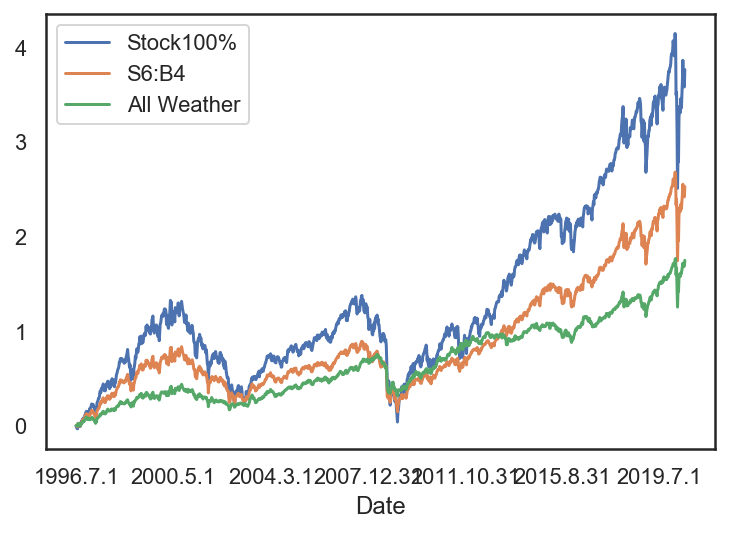

In [149]:
port_df.plot() 

In [150]:
# # 원 그래프
# labels_3 = ["Stock", "Interm_bond", "Long_bond", "Commodity", "Gold"]
# # ratio_2 = [60, 40]
# ratio_3 = [30, 15, 40, 7.5, 7.5]

# plt.pie(ratio_3, labels = labels_3)
# plt.show()

### 3. 데이터 분석


In [26]:
# # (움직이는 그래프로)30년 백테스팅 추이 그래프 - 원점을 어떻게 설정할 것인가? 
# 1000으로 잡고 비율(x) 조정해서 전체에다가 곱하기로 그래프 그리기 

In [25]:
# back testing 
# train_test_spilt 로 트레인 시킬것
# 트러블 슈팅 때 질문

In [241]:
# 변동성 정의 다시 말해주기 마이너스 폭

In [242]:
# DCT

#### 1) 기대수익률 (return)

In [ ]:
# 기대 수익률, 
# https://m.blog.naver.com/PostView.nhn?blogId=anthouse28&logNo=221640874003&proxyReferer=https:%2F%2Fwww.google.com%2F





#### 2) RISK 
##### 2-1) 변동성

In [ ]:
#변동성(기대 수익률 표준편차) 분석 
# 변동성이 적으면 안정적이다 ! 라는 결론 도출

##### 2-2) 돈 잃을 가능성

In [ ]:
# 최악의 해(년단위), 최대 낙폭(주단위), mdd

In [ ]:
#  지수와 상품간 correlation 
# 마지막에 상관관계 적용해서 99% 구하기 
# 상관계수함수 쓰기

# (마지막에 신뢰도 수정)

### 4. 데이터 시각화

In [ ]:
# dataframe으로 포트폴리오 3개 비교하기 
# no, 포트폴리오명, 최초금액, 최종금액, 30년간 수익률, 최고의 해, 최악의 해, 최대 낙폭, 상관관계
# 상관관계 : 시장(s&p 500)과 포트폴리오와의 관계 -> 자산배분 잘되있다.

In [ ]:
# 상관관계 할때 hitmap 

In [ ]:
# 진짜 올웨더가 최선일까?
# 움직이는 거..
#https://m.blog.naver.com/anthouse28/221611131960

In [ ]:
# 당신은 어떤 투자 성향입니까 ?
# 공격, 중도, 안정 - 포트폴리오 퍼센트 정의 
# 입력하면, 쫙